In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import yfinance
from datetime import datetime

In [ ]:
tickers = ['NVDA','AMD', 'INTC', 'QCOM']
df=pd.DataFrame()
dat=datetime.strptime("1980-03-18", "%Y-%m-%d")
for col in tickers:
    temp= yfinance.download(col)[['Close']]
    if temp.index[0]>dat:
        dat=temp.index[0]
    #print(dat) 
    temp=temp.rename(columns={'Close':f'{col}'}).loc[dat:]    
    #temp=temp.loc[dat:]
    #print(temp.head(1))
    
    df=pd.concat([df,temp],axis=1)

df.head(2)

[*********************100%***********************]  1 of 1 completed


1999-01-22 00:00:00


[*********************100%***********************]  1 of 1 completed


1999-01-22 00:00:00


[*********************100%***********************]  1 of 1 completed


1999-01-22 00:00:00


[*********************100%***********************]  1 of 1 completed

1999-01-22 00:00:00


,NVDA,AMD,INTC,QCOM
Date,,,,
1999-01-22,0.041016,10.78125,32.218750,3.687500
1999-01-25,0.045313,10.71875,32.656250,3.632813
1999-01-26,0.041797,11.00000,34.234375,3.750000
1999-01-27,0.041667,10.62500,33.187500,3.695313
1999-01-28,0.041536,11.43750,34.296875,4.023438


Analysis for NVDA:
count    6514.000000
mean        7.948929
std        21.635541
min         0.034115
25%         0.279500
50%         0.463125
75%         4.481188
max       148.880005
Name: NVDA, dtype: float64


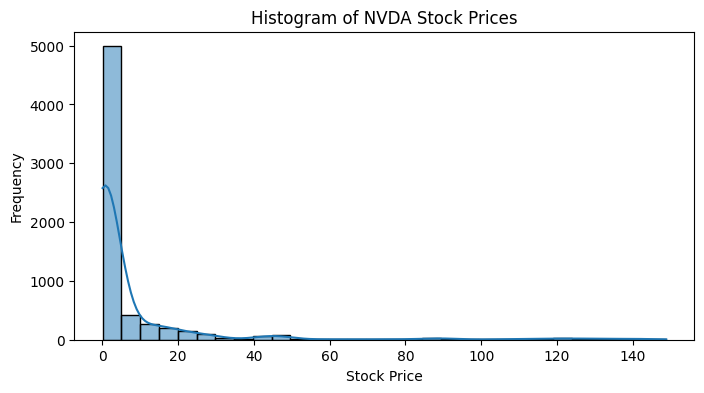

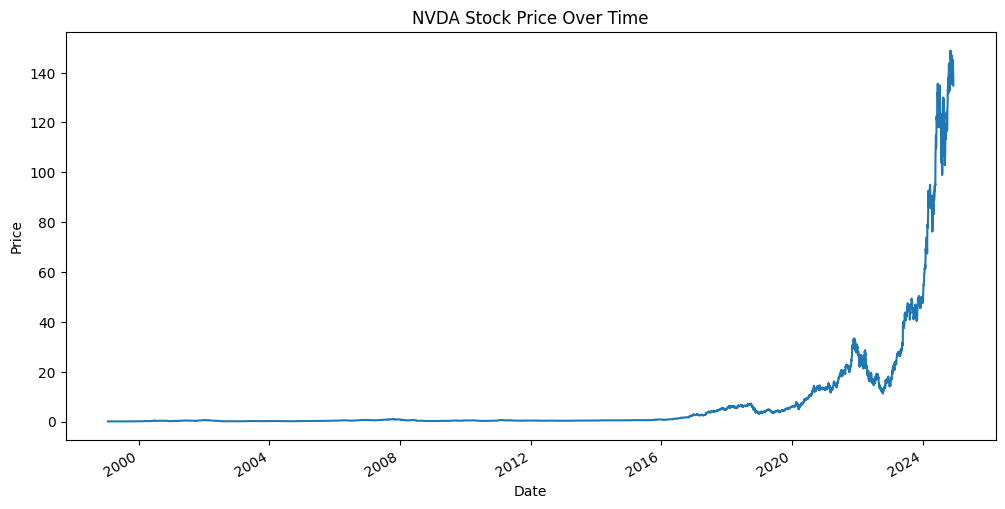

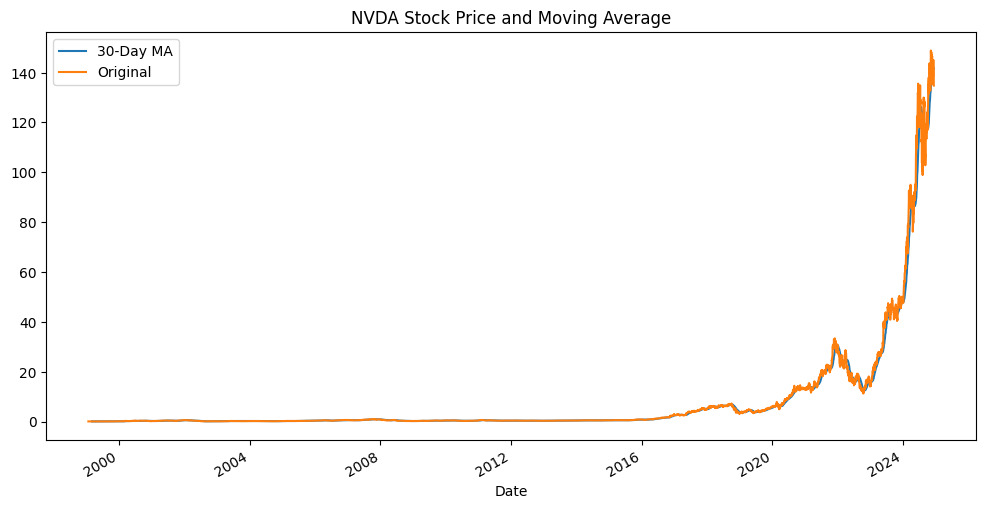

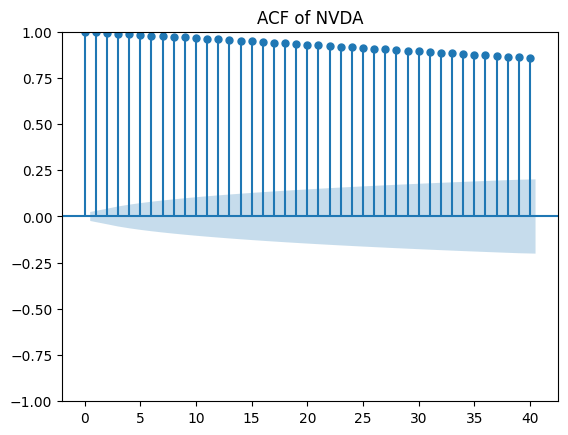

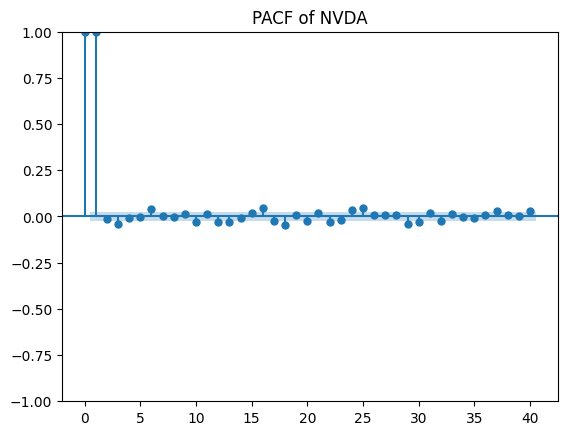

Analysis for AMD:
count    6514.000000
mean       29.756641
std        40.032827
min         1.620000
25%         6.260000
50%        13.000000
75%        29.683125
max       211.380005
Name: AMD, dtype: float64


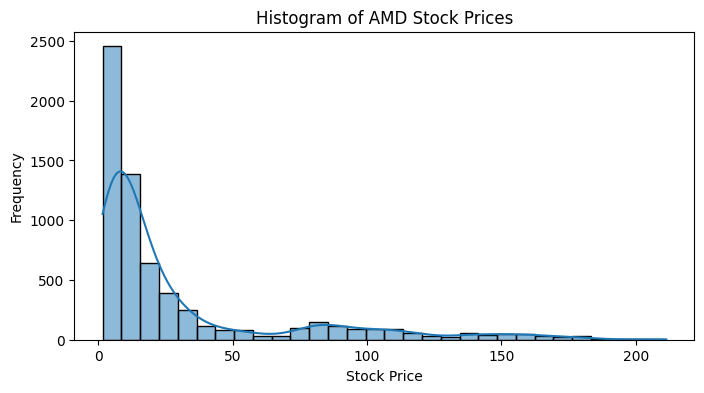

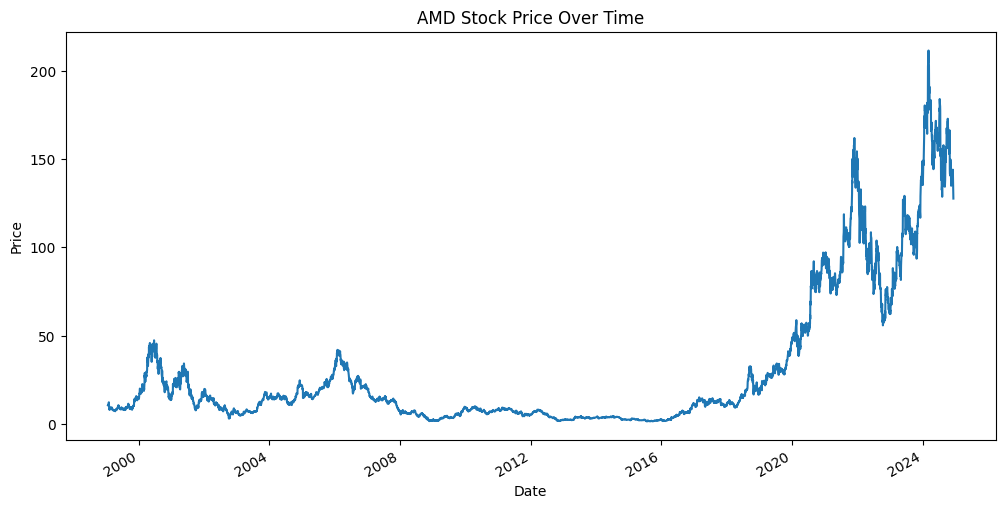

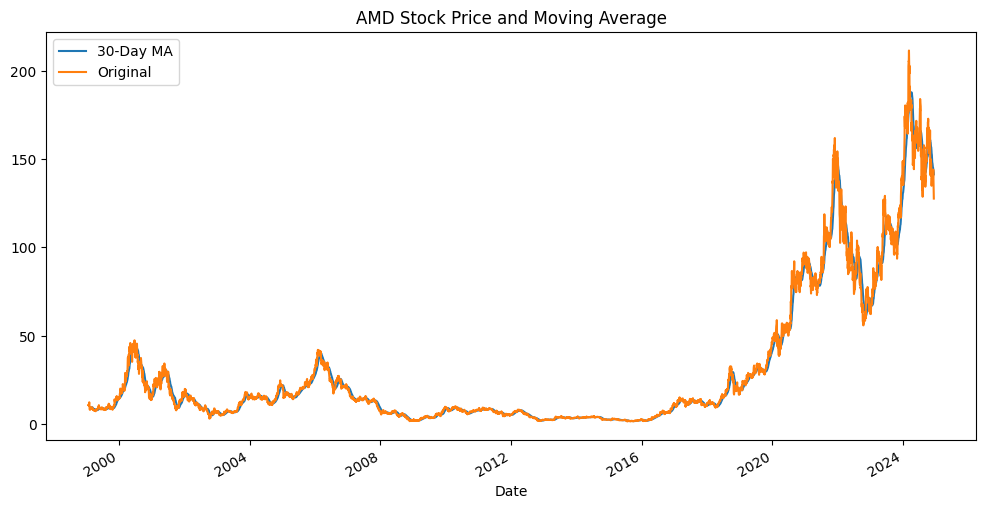

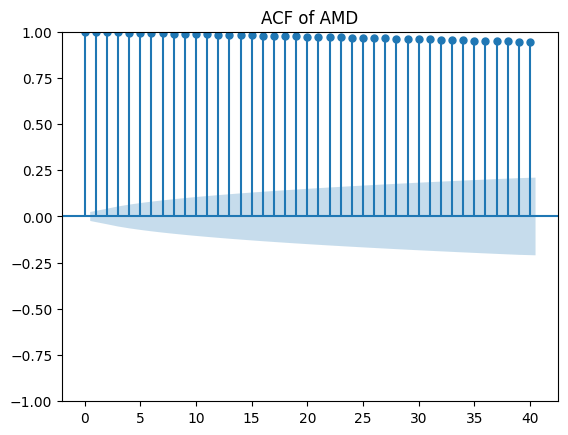

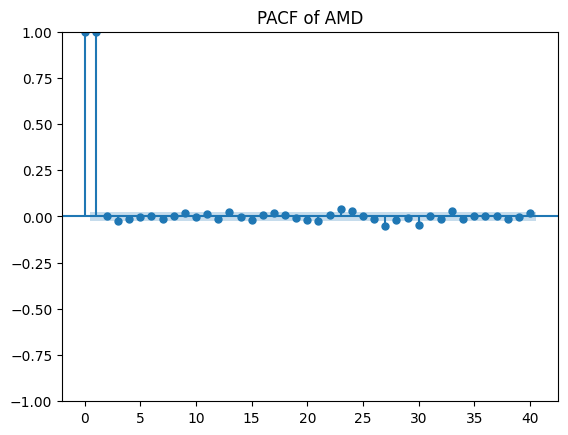

Analysis for INTC:
count    6514.000000
mean       32.177783
std        12.803645
min        12.080000
25%        22.200001
50%        28.670938
75%        37.750000
max        74.875000
Name: INTC, dtype: float64


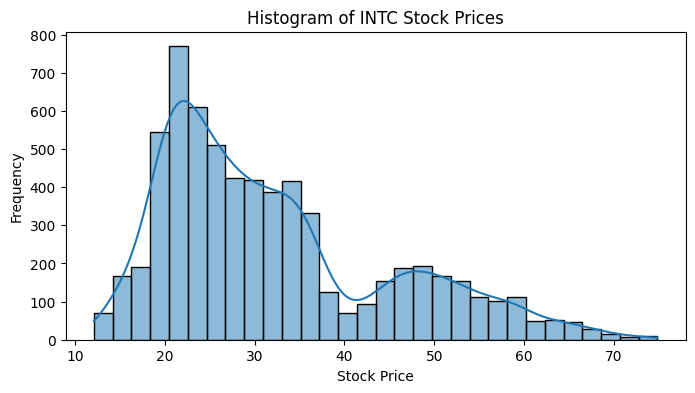

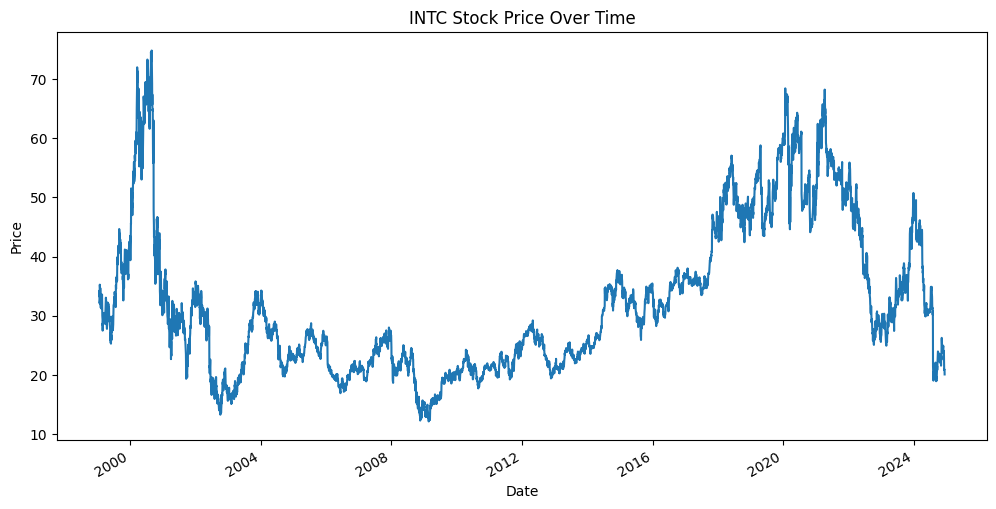

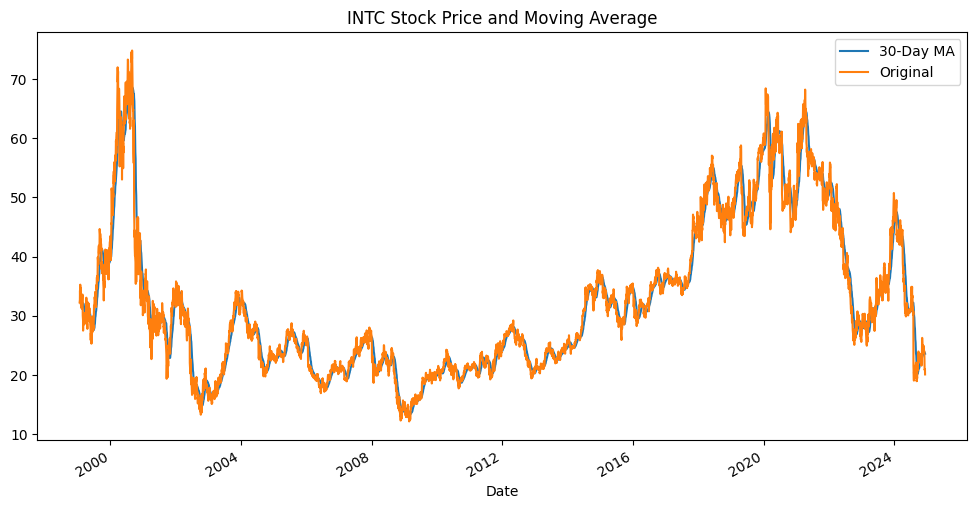

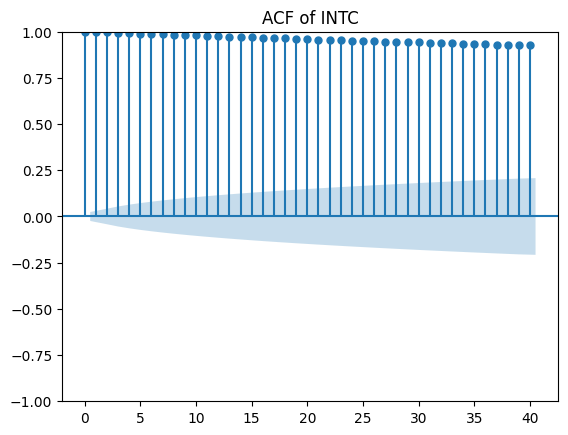

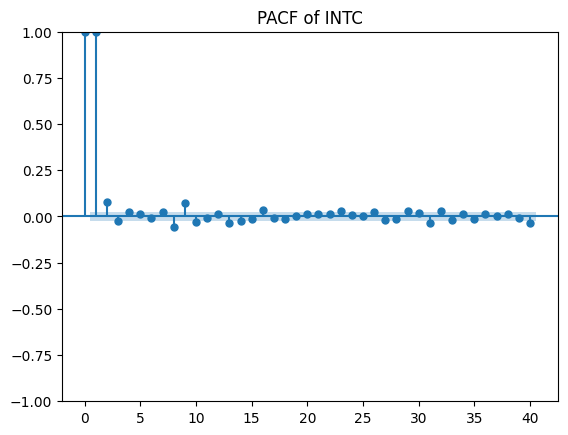

Analysis for QCOM:
count    6514.000000
mean       63.930129
std        40.473451
min         3.632813
25%        38.014998
50%        53.389999
75%        73.007502
max       227.089996
Name: QCOM, dtype: float64


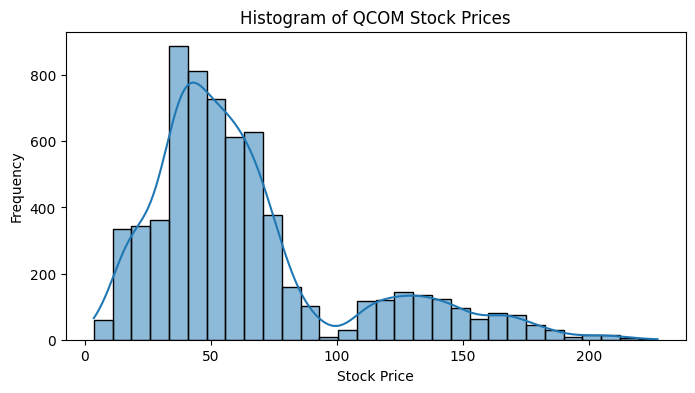

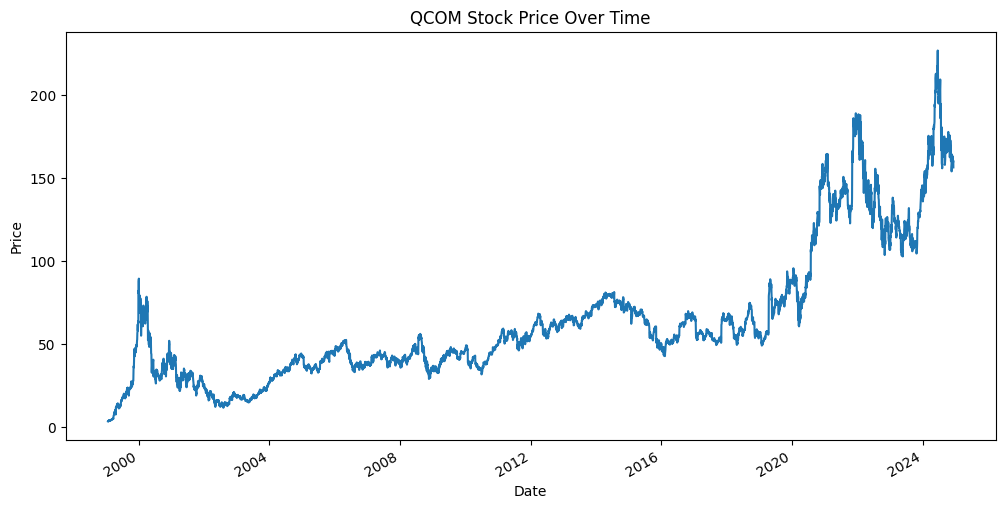

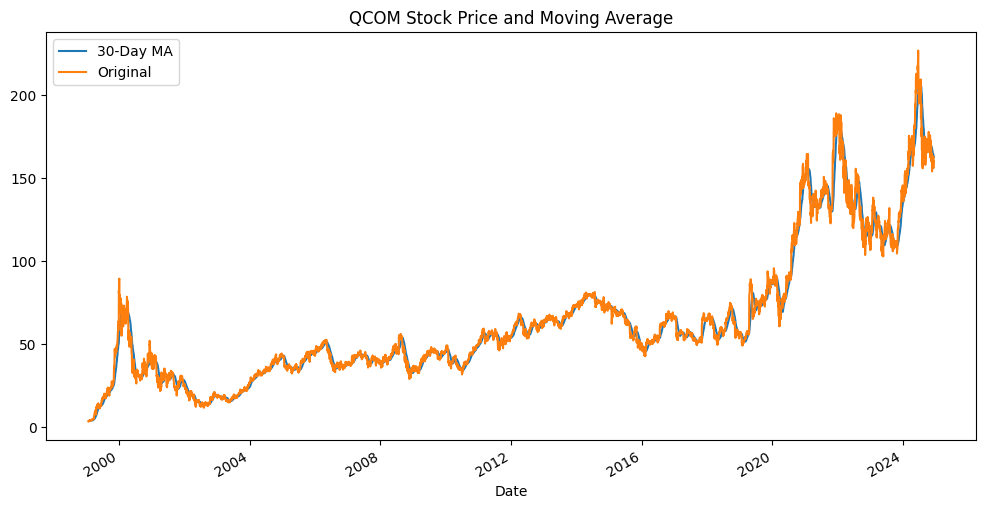

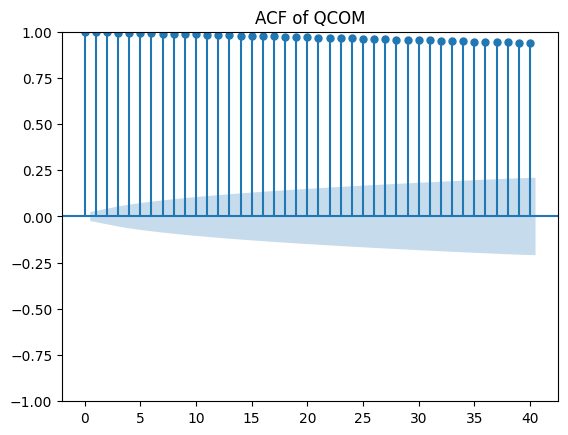

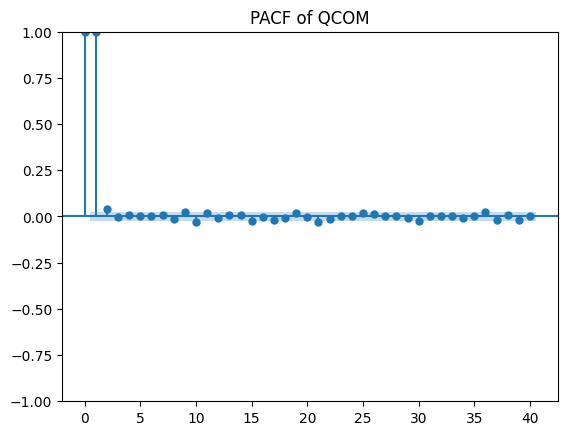

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Individual company analysis
def analyze_company(df, ticker):
    print(f"Analysis for {ticker}:")
    print(df[ticker].describe())
    
    # Plot Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df[ticker].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {ticker} Stock Prices')
    plt.xlabel('Stock Price')
    plt.ylabel('Frequency')
    plt.show()

    # Line Chart
    plt.figure(figsize=(12, 6))
    df[ticker].plot(title=f'{ticker} Stock Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

    # Moving Average
    plt.figure(figsize=(12, 6))
    df[ticker].rolling(window=30).mean().plot(label='30-Day MA')
    df[ticker].plot(label='Original')
    plt.title(f'{ticker} Stock Price and Moving Average')
    plt.legend()
    plt.show()

    # ACF and PACF
    plot_acf(df[ticker].dropna(), lags=40, title=f'ACF of {ticker}')
    plt.show()
    plot_pacf(df[ticker].dropna(), lags=40, title=f'PACF of {ticker}')
    plt.show()

# Analyze each company
for ticker in tickers:
    analyze_company(df, ticker)


Correlation Matrix:
          NVDA       AMD      INTC      QCOM
NVDA  1.000000  0.829960  0.119516  0.732182
AMD   0.829960  1.000000  0.397157  0.866858
INTC  0.119516  0.397157  1.000000  0.423178
QCOM  0.732182  0.866858  0.423178  1.000000


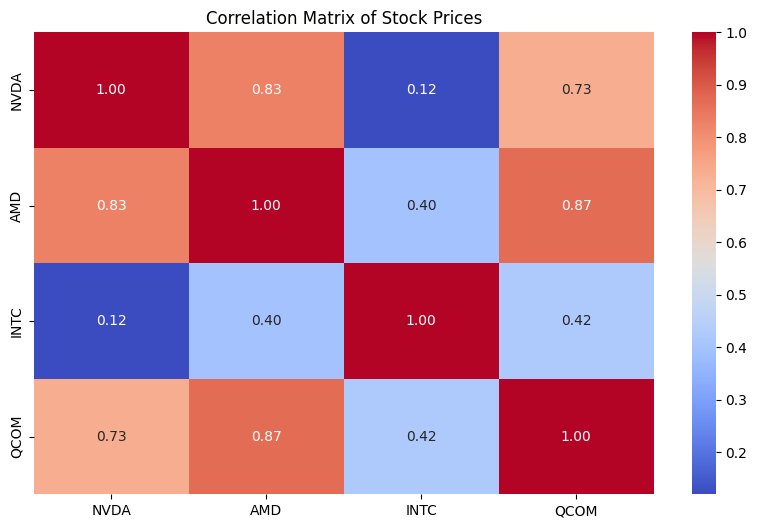

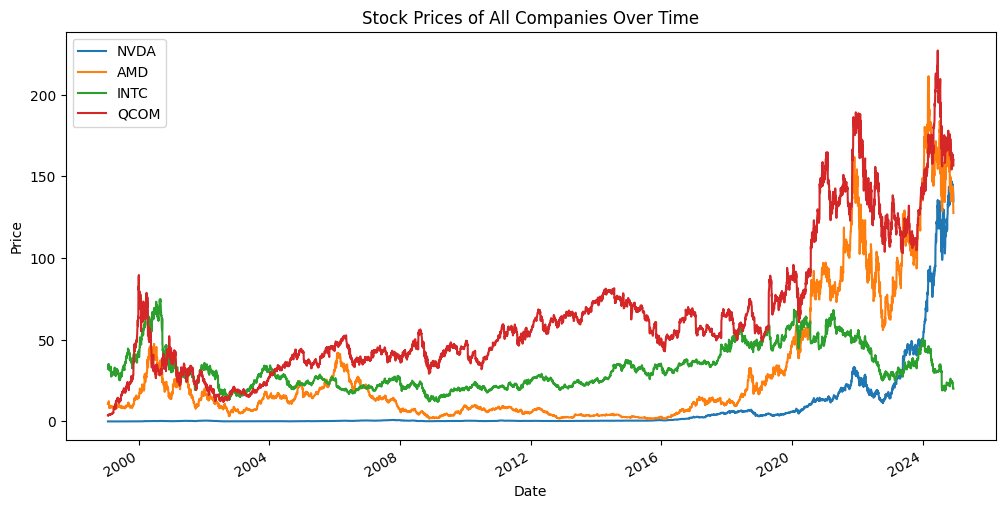

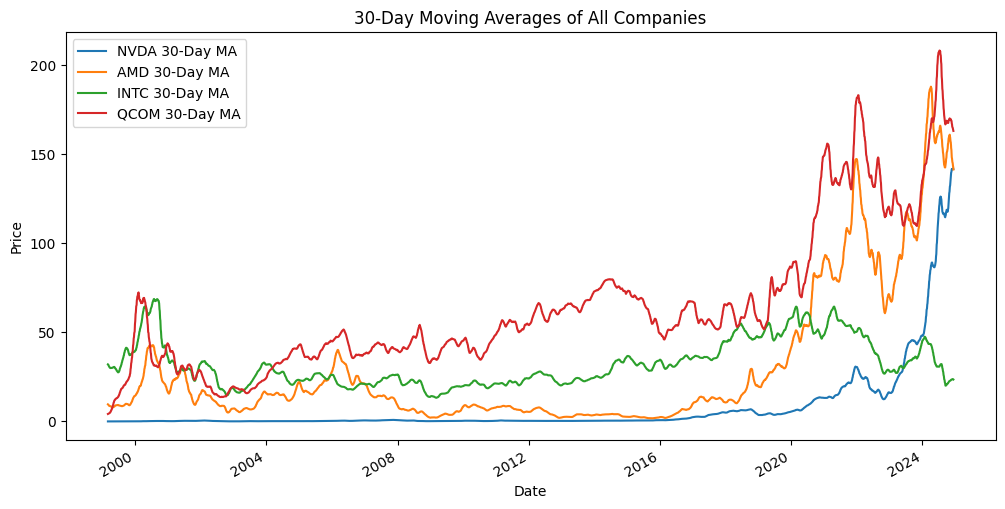

In [49]:
# Correlation Matrix
correlation = df.corr()
print("Correlation Matrix:")
print(correlation)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Prices')
plt.show()

# Combined Line Chart
plt.figure(figsize=(12, 6))
for ticker in tickers:
    df[ticker].plot(label=ticker)
plt.title('Stock Prices of All Companies Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Combined Moving Averages
plt.figure(figsize=(12, 6))
for ticker in tickers:
    df[ticker].rolling(window=30).mean().plot(label=f'{ticker} 30-Day MA')
plt.title('30-Day Moving Averages of All Companies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


********************************************************************************
********************************************************************************
********************************************************************************


[*********************100%***********************]  1 of 1 completed


(6.5697846185115285, 1.0, 35, 6477, {'1%': -3.431360019071387, '5%': -2.8619863416168188, '10%': -2.567007584327379}, 13486.575535311003)
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
********************************************************************************
ADF Test for NVDA:
ADF Statistic: 6.246356529793754
p-value: 1.0
Critical Values:
   1%: -3.4313598630942765
   5%: -2.861986272700051
   10%: -2.567007547641477
NVDA series is not stationary.

               Critical Value     Value
1%                  -3.431360       NaN
ADF Statistic             NaN  6.246357
p-value                   NaN       1.0
Stationary                NaN     False
Ticker                    NaN      NVDA
Test                   

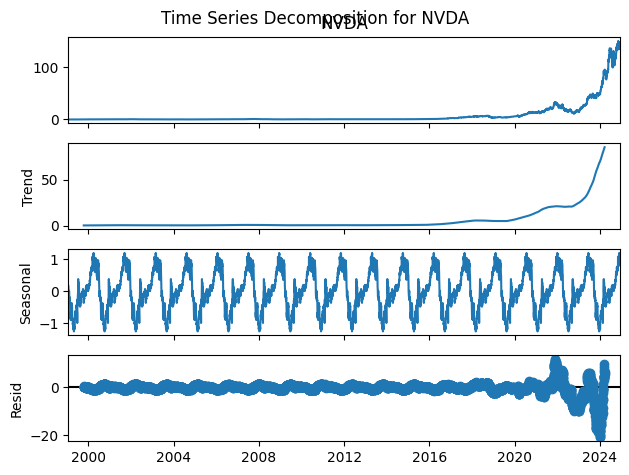

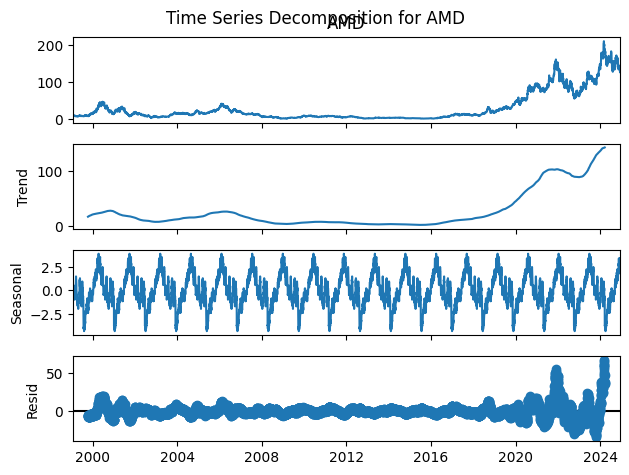

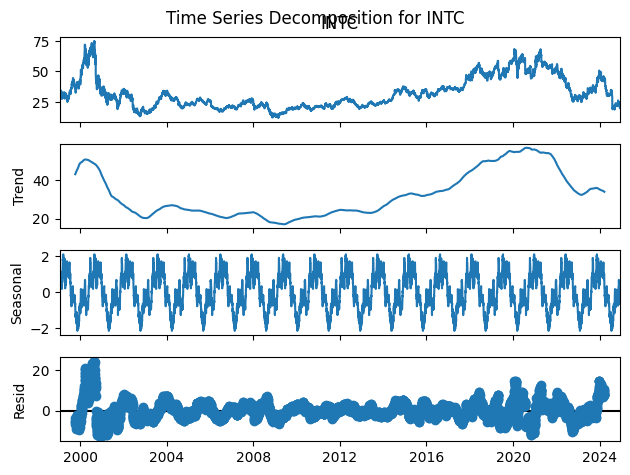

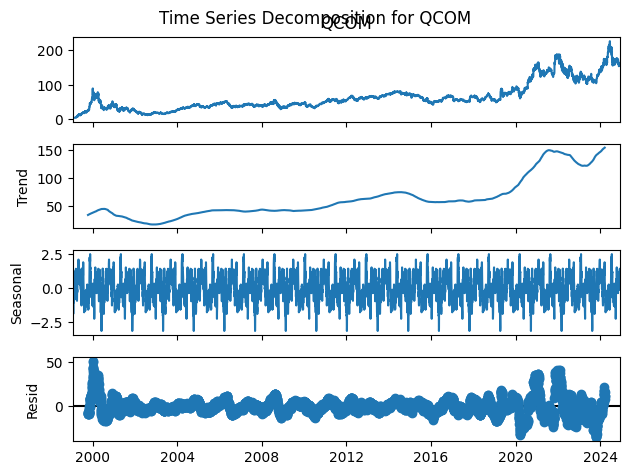

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# print("*"*80)
# print("*"*80)
# print("*"*80)
# nd=yfinance.download('NVDA')
# print(adfuller(nd.dropna()["Close"]))
# print("*"*80)
# print("*"*80)
# print("*"*80)

# Test stationarity for each company
def test_stationarity(series, ticker):
    result_df=pd.DataFrame()
    result = adfuller(series.dropna())
    print("*"*80)
    #print(result)
    print("*"*80)
    print(f'ADF Test for {ticker}:')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        result_df.loc[key,"Critical Value"]=value
        result_df.loc["ADF Statistic","Value"]=result[0]
        result_df.loc["p-value","Value"]=result[1]
        result_df.loc["Stationary","Value"]=result[1]<0.05
        result_df.loc["Ticker","Value"]=ticker
        result_df.loc["Test","Value"]="ADF"
        
    if result[1] > 0.05:
        print(f"{ticker} series is not stationary.\n")
    else:
        print(f"{ticker} series is stationary.\n")
    
    return result_df


for ticker in tickers:
    adf_df=test_stationarity(df[ticker], ticker)
    print(adf_df)

# Decompose time series
def decompose_series(series, ticker):
    decomposition = seasonal_decompose(series.dropna(), model='additive', period=365)
    decomposition.plot()
    plt.suptitle(f'Time Series Decomposition for {ticker}')
    plt.show()

for ticker in tickers:
    decompose_series(df[ticker], ticker)


In [51]:
# from statsmodels.tsa.stattools import adfuller
# import pandas as pd
# print("*"*80)
# print("*"*80)
# print("*"*80)
# print("*"*80)
# nd=yfinance.download('NVDA')
# print(adfuller(nd.dropna()["Close"]))
# print("*"*80)
# print("*"*80)
# print("*"*80)

# def test_stationarity(series, ticker):
#     result = adfuller(series.dropna())
#     print("*"*80)
#     print(result)
#     print("*"*80)
#     print(f'ADF Test for {ticker}:')
#     print(f"ADF Statistic: {result[0]}")
#     print(f"p-value: {result[1]}")
#     if result[1] <= 0.05:
#         print(f"{ticker} is stationary.\n")
#     else:
#         print(f"{ticker} is not stationary.\n")

# # Differencing and testing stationarity
# for ticker in df.columns:
#     print(f"Testing {ticker}:")
#     differenced = df[ticker].diff().dropna()
#     test_stationarity(differenced, ticker)


ACF and PACF for NVDA:


<Figure size 1000x400 with 0 Axes>

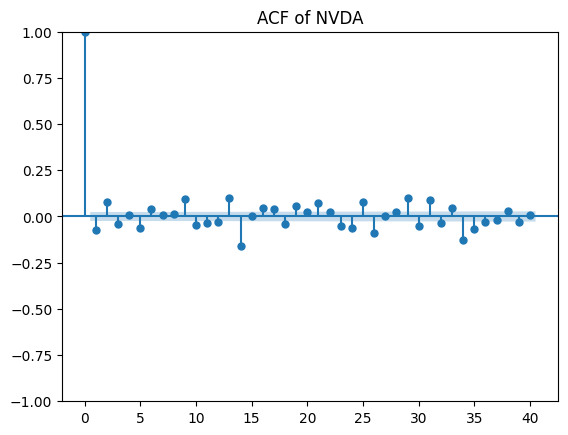

<Figure size 1000x400 with 0 Axes>

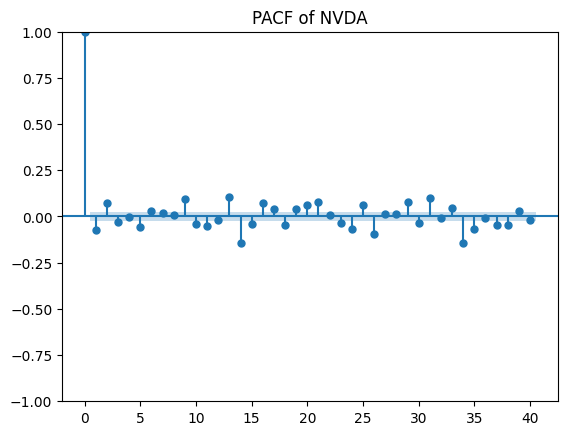

ACF and PACF for AMD:


<Figure size 1000x400 with 0 Axes>

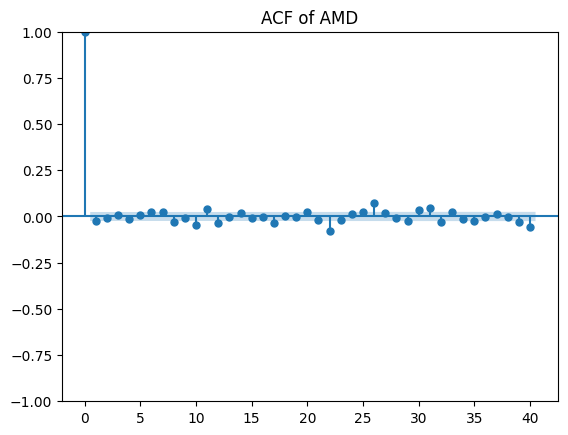

<Figure size 1000x400 with 0 Axes>

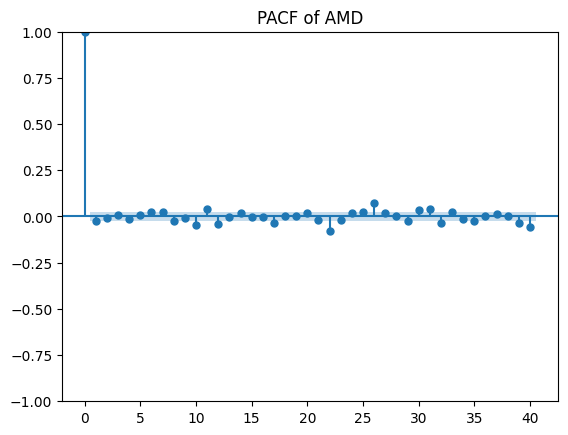

ACF and PACF for INTC:


<Figure size 1000x400 with 0 Axes>

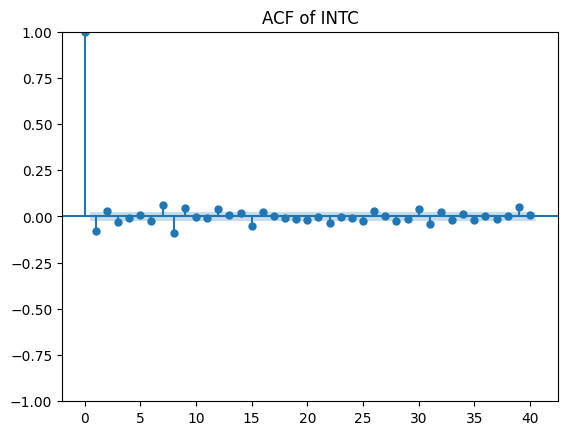

<Figure size 1000x400 with 0 Axes>

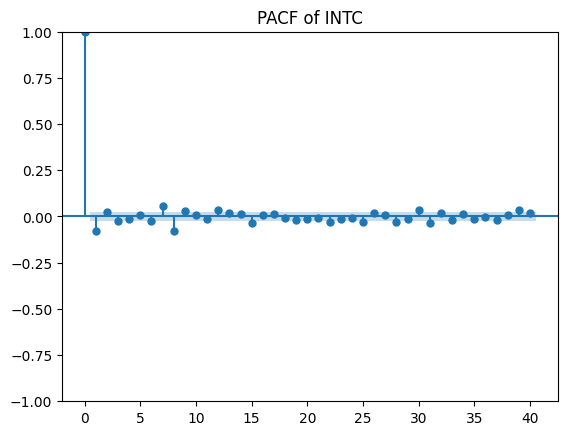

ACF and PACF for QCOM:


<Figure size 1000x400 with 0 Axes>

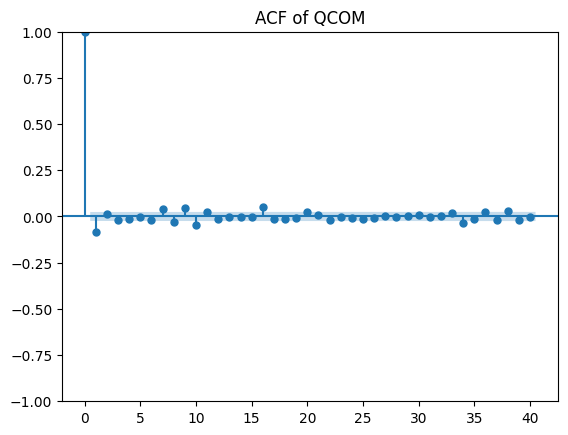

<Figure size 1000x400 with 0 Axes>

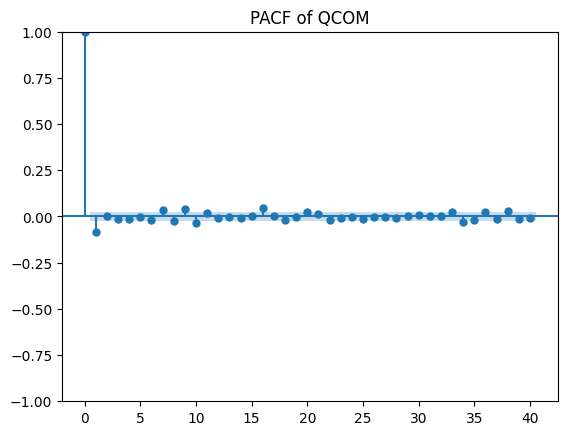

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

for ticker in df.columns:
    print(f"ACF and PACF for {ticker}:")
    differenced = df[ticker].diff().dropna()
    
    plt.figure(figsize=(10, 4))
    plot_acf(differenced, lags=40)
    plt.title(f'ACF of {ticker}')
    plt.show()

    plt.figure(figsize=(10, 4))
    plot_pacf(differenced, lags=40)
    plt.title(f'PACF of {ticker}')
    plt.show()


In [53]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings
warnings.filterwarnings("ignore")

def find_best_arima(series, max_p=4, max_d=3, max_q=4):
    best_aic = float('inf')
    best_params = None
    
    for p, d, q in itertools.product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
        try:
            model = ARIMA(series, order=(p, d, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_params = (p, d, q)
        except:
            continue
    
    return best_params, best_aic

# Finding the best p, d, q for each company
for ticker in df.columns:
    print(f"Finding best ARIMA parameters for {ticker}:")
    best_params, best_aic = find_best_arima(df[ticker])
    print(f"Best Parameters for {ticker}: p={best_params[0]}, d={best_params[1]}, q={best_params[2]} with AIC={best_aic}\n")


Finding best ARIMA parameters for NVDA:
Best Parameters for NVDA: p=3, d=2, q=4 with AIC=14299.356496674078

Finding best ARIMA parameters for AMD:
Best Parameters for AMD: p=3, d=1, q=3 with AIC=24722.785663480798

Finding best ARIMA parameters for INTC:
Best Parameters for INTC: p=3, d=1, q=4 with AIC=16614.848937770224

Finding best ARIMA parameters for QCOM:
Best Parameters for QCOM: p=2, d=1, q=4 with AIC=26624.94366688047



In [58]:
# import warnings
# warnings.filterwarnings("ignore")
# import itertools
# from statsmodels.tsa.arima.model import ARIMA

# #list(itertools.product(range(3), range(3), range(3)))
# param_sets=pd.DataFrame(columns=['p','d','q','aic','ticker'])
# for tick in df.columns:
#     params=[]
#     for p in range(5):
#         for d in range(3):
#             for q in range(5):
#                 aic_ar=ARIMA(df[tick], order=(p, d, q)).fit().aic
#                 if aic_ar is not None:
#                     params.append((p, d, q, aic_ar, ticker))
                    
#                 #params.append((p,d,q,ARIMA(df['NVDA'], order=(p, d, q)).fit().aic))
#                     #params.append((p,d,q,aic_ar,tick))

#     best_params=sorted(params, key=lambda x: x[3], reverse=False)[:1]
#     p,d,q,aic_res,_=best_params[0]
#     param_df=pd.DataFrame(best_params, columns=['p','d','q','aic','ticker'])
#     param_sets=pd.concat([param_sets,param_df], ignore_index=True)

# param_sets

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#p,d,q
#res=ARIMA(df['NVDA'], order=(p, d, q)).fit().summary()
#res
#def Arima_model(df):
#    model=ARIMA(df, order=(df["p"],df["d"],df["q"])).fit()
#    return model


def Arima_model(time_series, p, d, q):
    try:
        model = ARIMA(time_series, order=(p, d, q)).fit()
        return model.aic
    except Exception as e:
        print(f"Failed to fit ARIMA({p}, {d}, {q}) for ticker: {time_series.name}, Error: {e}")
        return None

#Arima_model(param_sets.iloc[0])
param_sets.iloc[0]["p"]
for row in range(len(param_sets)):
    p=param_sets.iloc[row]["p"]
    d=param_sets.iloc[row]["d"]
    q=param_sets.iloc[row]["q"]
    tick=param_sets.iloc[row]["ticker"]
    aic_res=Arima_model(df[tick], p, d, q)
    param_sets.loc[row, "aic"]=aic_res
    #print(row)


In [ ]:
param_sets

,p,d,q,aic,ticker
0,2,1,2,14402.094750,NVDA
1,2,1,2,24734.315679,AMD
2,1,1,1,16668.470773,INTC
3,1,1,0,26646.030394,QCOM


In [59]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA

# List of tickers
tickers = ['NVDA', 'AMD', 'INTC', 'QCOM']

# Initialize an empty DataFrame with appropriate columns
param_sets = pd.DataFrame(columns=['p', 'd', 'q', 'aic', 'ticker'])

# Download Close prices for all tickers and concatenate into a single DataFrame
df = pd.concat([yf.download(ticker)['Close'] for ticker in tickers], axis=1)
df.columns = tickers

# Drop rows with any missing values
df.dropna(inplace=True)

for tick in tickers:
    params = []
    for p in range(5):
        for d in range(4):
            for q in range(5):
                try:
                    # Fit ARIMA model and get AIC
                    model = ARIMA(df[tick], order=(p, d, q)).fit()
                    aic_ar = model.aic
                    params.append((p, d, q, aic_ar, tick))
                except Exception as e:
                    # Handle cases where the model fails to fit
                    print(f"Failed to fit ARIMA{(p, d, q)} for {tick}: {e}")
    
    # Sort the parameters by AIC in ascending order and select the top 2
    best_params = sorted(params, key=lambda x: x[3])[:1]
    
    # Convert best_params to a DataFrame
    best_params_df = pd.DataFrame(best_params, columns=['p', 'd', 'q', 'aic', 'ticker'])
    
    # Concatenate the best_params_df to param_sets
    param_sets = pd.concat([param_sets, best_params_df], ignore_index=True)

# Display the resulting param_sets DataFrame
param_sets.sort_values(by='aic')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,p,d,q,aic,ticker
0,3,2,4,14295.279904,NVDA
2,3,1,4,16614.725769,INTC
1,2,1,3,24707.563409,AMD
3,2,1,4,26625.449133,QCOM


In [ ]:
plot